# Explore here

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)

df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [3]:
print(df.head())
print(df.describe())


                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633
             sales
count   366.000000
mean    524.963968
std     275.089698
min      53.803211
25%     290.186822
50%     520.699468
75%     763.289263
max    1000.482785


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


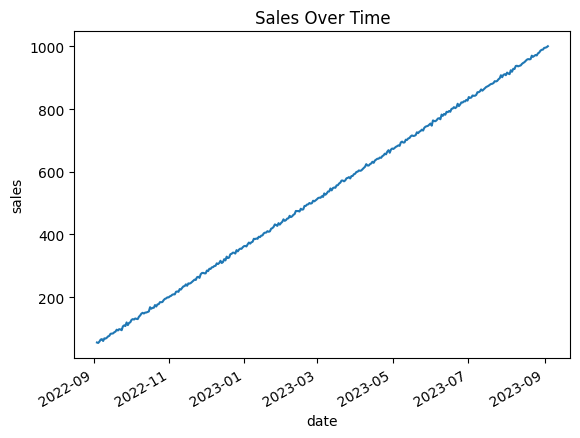

In [8]:
import matplotlib.pyplot as plt

df['sales'].plot()
plt.title('Sales Over Time')
plt.xlabel('date')
plt.ylabel('sales')
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


In [11]:
from statsmodels.tsa.arima.model import ARIMA


In [12]:
train = df['sales'][:int(len(df)*0.8)]
test = df['sales'][int(len(df)*0.8):]


In [13]:
model = ARIMA(train, order=(5,1,0))  # Example parameters
model_fit = model.fit()


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
forecast = model_fit.forecast(steps=len(test))

forecast

2023-06-22 17:10:08.079328    809.364154
2023-06-23 17:10:08.079328    809.222466
2023-06-24 17:10:08.079328    810.705499
2023-06-25 17:10:08.079328    811.614443
2023-06-26 17:10:08.079328    813.675607
                                 ...    
2023-08-30 17:10:08.079328    834.592420
2023-08-31 17:10:08.079328    834.629313
2023-09-01 17:10:08.079328    834.664313
2023-09-02 17:10:08.079328    834.697516
2023-09-03 17:10:08.079328    834.729016
Freq: D, Name: predicted_mean, Length: 74, dtype: float64

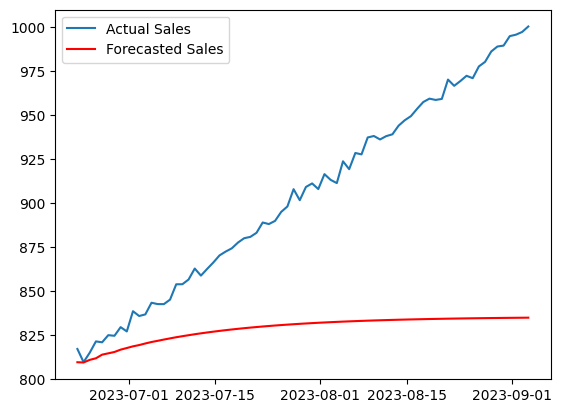

In [15]:
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast)
rmse = mse ** 0.5
print(f'RMSE: {rmse}')


RMSE: 90.80968309360657


In [19]:
import pickle

with open('arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)
